In [1]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
color = [0.092304, 0.32922, 0.38504]

In [3]:
np.random.seed(114)

In [4]:
def plot_pdf(ax, sd: float, lim: float):
    """Plot probability density function."""
    xs = np.arange(-lim, lim, 0.01)
    ax.plot(xs, norm.pdf(xs, -1, sd) / 2, '--', color='goldenrod', alpha=0.75)
    ax.plot(xs, norm.pdf(xs, 1, sd) / 2, '--', color='goldenrod', alpha=0.75)

In [5]:
def sample(n: int, sd: float):
    """Sample n data points each from two Gaussians with
    standard deviation sd and means 1 and -1.
    """
    return np.concatenate([np.random.randn(n) * sd + 1, np.random.randn(n) * sd - 1])

In [6]:
n = 15_000
sds = [0.1, 0.7, 1.0]

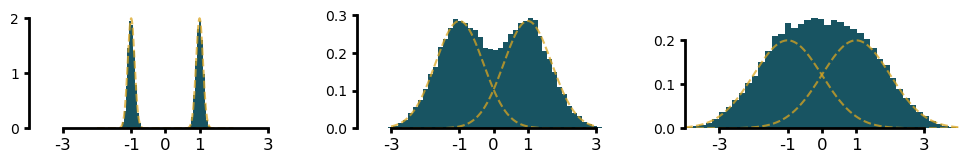

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 1.5), sharey=False, sharex=True)

for i, sd in enumerate(sds):

    ax[i].hist(sample(n, sd), bins=50, density=True, color=color)
    plot_pdf(ax[i], sd=sd, lim=2 + i)
    plt.setp(ax[i].spines.values(), linewidth=2)

ax[0].set_xlim([-4, 4])
[axs.set_xticks([-3, -1, 0, 1, 3], labels=[-3, -1, 0, 1, 3], fontsize=12) for axs in ax]
[axs.xaxis.set_tick_params(width=2) for axs in ax]
[axs.yaxis.set_tick_params(width=2) for axs in ax]
sns.despine(trim=0.1)

# fig.savefig('figures/1d_synthetic.pdf', transparent=True, bbox_inches='tight')